# Coronavirus Analysis

## Preprocessing of Data

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Cumulative Data
cum_confirmed_data = pd.read_csv('time_series_19-covid-Confirmed.csv')
cum_deaths_data = pd.read_csv('time_series_19-covid-Deaths.csv')
cum_recovered_data = pd.read_csv('time_series_19-covid-recovered.csv')

world_cum_confirmed_cases = cum_confirmed_data.iloc[:, 4:].sum(axis=0)
world_cum_deaths_cases = cum_deaths_data.iloc[:, 4:].sum(axis=0)
world_cum_recovered_cases = cum_recovered_data.iloc[:, 4:].sum(axis=0)

In [3]:
# New Data
def cumulative_to_new(data):
    '''
    Convert cumulative data to new cases data.
    
    Parameters
    ----------
    data: DataFrame
        Cumulative data that needs to be converted to new cases data.
    
    Returns
    -------
    DataFrame: DataFrame of new cases data.
    '''
    new_data = data.copy()
    new_data.insert(4, '1/21/20', np.zeros(len(data), dtype=int))
    for i in np.arange(len(new_data['Country/Region'])):
        new_data.loc[i, 5:] = np.array(new_data.iloc[i, 5:]) - np.array(new_data.iloc[i, 4:-1])
    return new_data

new_confirmed_data = cumulative_to_new(cum_confirmed_data)
new_deaths_data = cumulative_to_new(cum_deaths_data)
new_recovered_data = cumulative_to_new(cum_recovered_data)

In [4]:
# Active Data
active_data = cum_confirmed_data.copy()
for i in np.arange(len(active_data['Country/Region'])):
    active_data.loc[i,4:] = cum_confirmed_data.iloc[i, 4:] - cum_deaths_data.iloc[i, 4:] - cum_recovered_data.iloc[i, 4:]

## Data Visualization

### Graphing Cases Worldwide

In [5]:
def worldwide_cum_cases(data, start_date='2020-01-22', end_date=None):
    '''
    Cumulative cases worldwide.
    
    Parameters
    ----------
    data: 2D array-like, length of subarrays >= 3
        Data in DataFrame and their labels in String (three datasets maximum)
        Example: [[data1, data1]['data1', 'data2']]
    
    start_date: String, optional, default: '2020-01-22'
    
    end_date: String, optional, default: None
    
    Returns
    -------
    None. Shows a graph
    '''
    if (not end_date):
        end_date = data[0][0].index[-1]
    plt.figure(figsize=(5, 3), dpi=100)
    plt.title('Amount of Cuminative Confirmed Cases Worldwide')
    plt.xlabel('Date')
    plt.ylabel('Amount of Cuminative Cases')
    dates = pd.to_datetime(data[0][0].index)
    label = 'o-'
    color = ['tab:blue', 'tab:orange', 'tab:green']
    for i in np.arange(len(data[0])):
        xaxis = dates[dates.get_loc(start_date):dates.get_loc(end_date)+1]
        yaxis = data[0][i][dates.get_loc(start_date):dates.get_loc(end_date)+1]
        plt.plot(xaxis, yaxis, 
                 label, color=color[i], markersize=3, label=data[1][i])
    # x axis
    xmin = start_date
    xmax = end_date
    plt.xlim(pd.to_datetime(xmin), pd.to_datetime(xmax) + (pd.to_datetime(xmax) - pd.to_datetime(xmin)) * 0.02)
    plt.xticks(pd.date_range(xmin, xmax, periods=5), rotation=-45, horizontalalignment='left')
    # y axis
    ymin = 0
    plt.ylim(ymin)
    # others
    plt.legend(fontsize='x-small')
    plt.grid(True, axis='y')

C:\Softwares\Anaconda\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


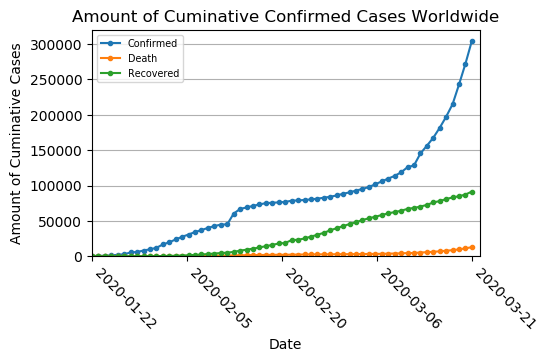

In [6]:
worldwide_cum_cases([[world_cum_confirmed_cases, world_cum_deaths_cases, world_cum_recovered_cases], 
                     ['Confirmed', 'Death', 'Recovered']])

### Graphing Cases in Regions

In [7]:
def graph_cases(data, region, start_date='2020-01-22', end_date=None):
    '''
    Patient cases of countries/regions, such as cumulative and new confirmed, deaths, and recovered, as well as active cases.
    
    Parameters
    ----------
    data: 2D array-like, length of subarrays >= 3
        Data in DataFrame and their labels in String (three datasets maximum)
        Example: [[data1, data1]['data1', 'data2']]
    
    region: 2D array-like, length of subarrays >= 4
        The countries to graph (four provinces maximum)
        Example: [['US', 'New York'], ['country', 'state']]
    
    start_date: String, optional, default: '2020-01-22'
    
    end_date: String, optional, default: None
    
    Returns
    -------
    None. Shows a graph
    '''
    if (not end_date):
        end_date = data[0][0].iloc[0, 4:].index[-1]
    
    # Graph settings
    plt.figure(figsize=(5, 3), dpi=100)
    plt.title('Amount of Cases')
    plt.xlabel('Date')
    plt.ylabel('Amount of Cases')
    label = ['o-', '>-', 's-']
    color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    
    region_name = region[0]
    region_type = region[1]
    for j in np.arange(len(region_name)):
        for i in np.arange(len(data[0])):
            if region_type[j] == 'country' or region_type[j] == 'region':
                region_type[j] = 'Country/Region'
            elif region_type[j] == 'province' or region_type[j] == 'state':
                region_type[j] = 'Province/State'
            cum_data = data[0][i][data[0][i][region_type[j]] == region_name[j]].iloc[:, 4:].sum(axis=0)
            dates = pd.to_datetime(cum_data.index)
            xaxis = dates[dates.get_loc(start_date):dates.get_loc(end_date)+1]
            yaxis = cum_data[dates.get_loc(start_date):dates.get_loc(end_date)+1]
            plt.plot(xaxis, yaxis, 
                     label[i], color=color[j], markersize=3, label=region_name[j] + ' ' + data[1][i])
    # x axis
    xmin = start_date
    xmax = end_date
    plt.xlim(pd.to_datetime(xmin), pd.to_datetime(xmax) + (pd.to_datetime(xmax) - pd.to_datetime(xmin)) * 0.05)
    plt.xticks(pd.date_range(xmin, xmax, periods=5), rotation=-45, horizontalalignment='left')
    # y axis
    ymin = 0
    plt.ylim(ymin)
    # others
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True, axis='y')

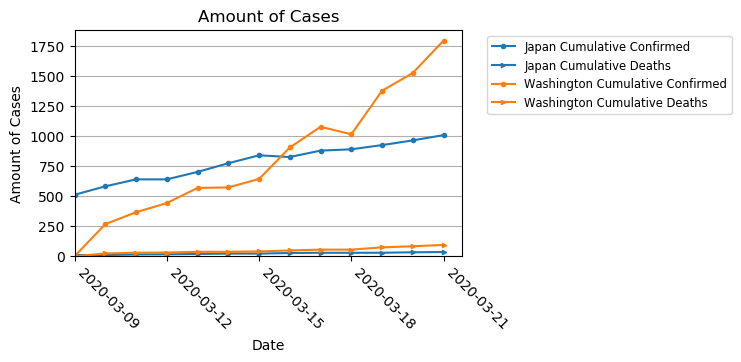

In [8]:
graph_cases([[cum_confirmed_data, cum_deaths_data], ['Cumulative Confirmed', 'Cumulative Deaths']],
            [['Japan', 'Washington'] ,['country', 'state']], '2020/3/9')

## Predictive Analysis

### Predicting Future Cases by Exponential Fit

In [12]:
def predict_cum_cases(data, label, region, region_type='region', prediction_date=None, threshold=None, show_plot=True):
    '''
    Predicts amount of cumulative cases on future dates by exponential fit.

    Parameters
    ----------
    data: DataFrame
        Dataset to predict
    
    region: String
        
    region_type: String, optional, default: 'region'
        Type of region. Acceptable: ['country', 'region', 'province', 'state']
    
    prediction_date: String, optional, default: None
    
    threshold: int or float, optional, default: None
    
    show_plot: bool, optional, default: True
        Whether or not show the plot

    Return
    ------
    int: Amount of cumulative cases at the date. 
    May show a graph of the original data and the exponential fit.
    '''
    def exp(x, offset, scale, stretch, delay):
        return scale * np.e ** (x / stretch - delay) + offset
    
    # process original data
    if region_type == 'country' or region_type == 'region':
        region_type = 'Country/Region'
    elif region_type == 'province' or region_type == 'state':
        region_type = 'Province/State'
    else:
        print('Incorrect region_type input.')
    cum_data = data[data[region_type] == region].iloc[:, 4:].sum(axis=0)
    if not threshold:
        threshold = cum_data[-1] * 0.05
    elif threshold < 1:
        threshold = cum_data[-1] * threshold
    elif threshold >= 1:
        threshold = threshold
    else:
        threshold = cum_data[-1] * 0.05
        print('Incorrect threshold data type. Let threshold = cum_data[-1] * 0.05.')
    cum_data = cum_data[sum(cum_data < threshold):]
    original_xaxis = pd.to_datetime(cum_data.index)
    original_yaxis = cum_data
    
    # fit original data using exponential fit 
    if not prediction_date:
        prediction_date = data.iloc[0, 4:].index[-1]
    start_date = original_xaxis[0].date()
    end_date = (pd.to_datetime(prediction_date) + pd.Timedelta('1 days')).date()

    params, cov = curve_fit(exp, np.arange(len(original_xaxis)), original_yaxis,
                            bounds=[-np.array([1e4, 0, 0, 100]), np.array([1e4, 10, 10, 100])])

    prediction_xaxis = pd.date_range(start_date, end_date)
    prediction_yaxis = exp(np.arange(len(prediction_xaxis)), *params)
    
    # Graph results
    plt.figure(figsize=(5, 3), dpi=100)
    plt.title('Amount of Cases')
    plt.xlabel('Date')
    plt.ylabel('Amount of Cases')
    plt.plot(original_xaxis, original_yaxis, '.b', label=region + '\n' + label, zorder=5)
    plt.plot(prediction_xaxis, prediction_yaxis, '.r', label='Exponential fit', zorder=1)
    # x axis
    xmin = start_date
    xmax = end_date + pd.Timedelta('1 days')
    plt.xlim(xmin, xmax + (xmax - xmin) * 0.05)
    plt.xticks(pd.date_range(xmin, xmax, periods=5), rotation=-45, horizontalalignment='left')
    # y axis
    ymin = 0
    plt.ylim(ymin)
    # other
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True, axis='y')
    if not show_plot:
        plt.close()

    return int(round(prediction_yaxis[-2]))

1781

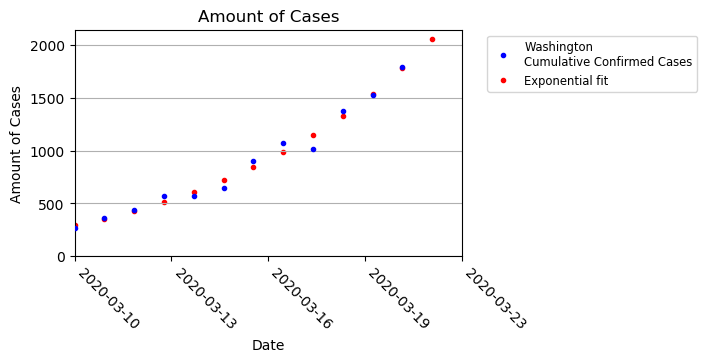

In [13]:
predict_cum_cases(cum_confirmed_data, 'Cumulative Confirmed Cases', 'Washington', 'state')

## Cross-sectional analysis

In [14]:
pd.read_csv('newest-total.csv')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515
...,...,...,...,...,...,...,...,...
271,NaN,Guernsey,2020-03-17T18:33:03,0,0,0,49.4500,-2.5800
272,NaN,Jersey,2020-03-17T18:33:03,0,0,0,49.1900,-2.1100
273,NaN,Puerto Rico,2020-03-17T16:13:14,0,0,0,18.2000,-66.5000
274,NaN,Republic of the Congo,2020-03-17T21:33:03,0,0,0,-1.4400,15.5560
